In [1]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 예제 2.7의 재무제표 API를 활용하여 수집한 데이터
samsung_revenue = pd.read_csv("./data/삼성전자_분기별_매출액.csv")
samsung_revenue = samsung_revenue.sort_values('quarter')
samsung_revenue

,value,quarter
5,77203607000000,2022-Q2
4,76781680000000,2022-Q3
3,70464575000000,2022-Q4
2,63745371000000,2023-Q1
1,60005533000000,2023-Q2
0,67404652000000,2023-Q3


In [2]:
# 비어 있는 figure 객체 생성 (Axes 객체 없음)
fig = plt.figure()
print(fig)

Figure(640x480)


<Figure size 640x480 with 0 Axes>

Figure(640x480)
Axes(0.125,0.11;0.775x0.77)


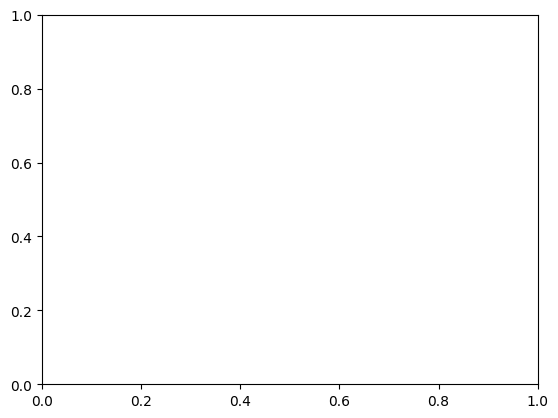

In [3]:
# figure 객체 1개, Axes 객체 1개 
fig, axe = plt.subplots()
print(fig)
print(axe)

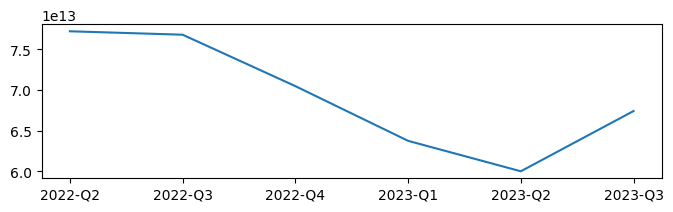

In [4]:
# axe 객체에 차트 추가
fig, axe = plt.subplots(figsize=(8, 2))
axe.plot(samsung_revenue['quarter'], samsung_revenue['value'])
plt.show()

Figure(640x480)
[<Axes: > <Axes: >]


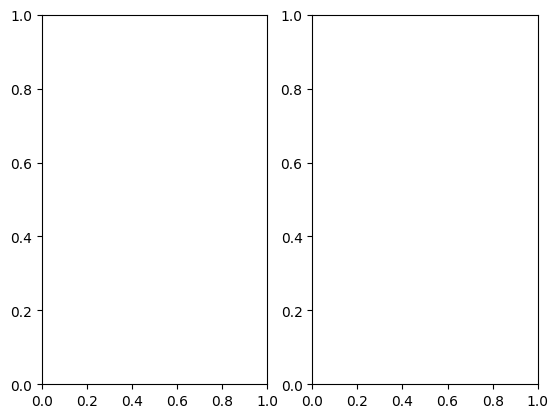

In [5]:
# figure 객체 1개, Axes 객체 2개 (1x2 grid)
fig, axes = plt.subplots(1, 2)
print(fig)
print(axes)

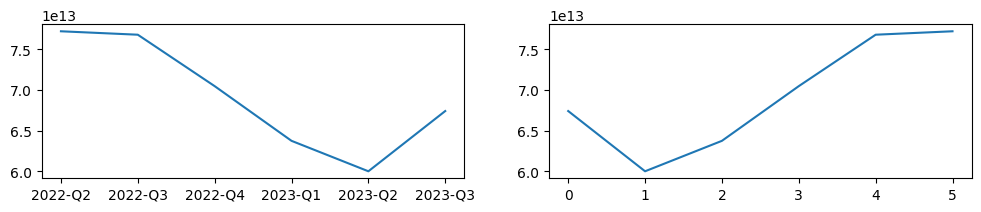

In [21]:
# axe 객체에 차트 추가
fig, axes = plt.subplots(1, 2, figsize=(12, 2))
axes[0].plot(samsung_revenue['quarter'], samsung_revenue['value'])
samsung_revenue['value'].plot(ax=axes[1])
plt.show()

Figure(640x480)
[[<Axes: > <Axes: >]
 [<Axes: > <Axes: >]]


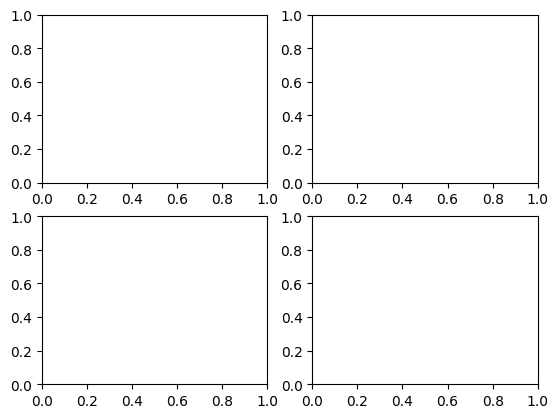

In [7]:
# figure 객체 1개, Axes 객체 4개 (2x2 grid)
fig, axes = plt.subplots(2, 2)
print(fig)
print(axes)

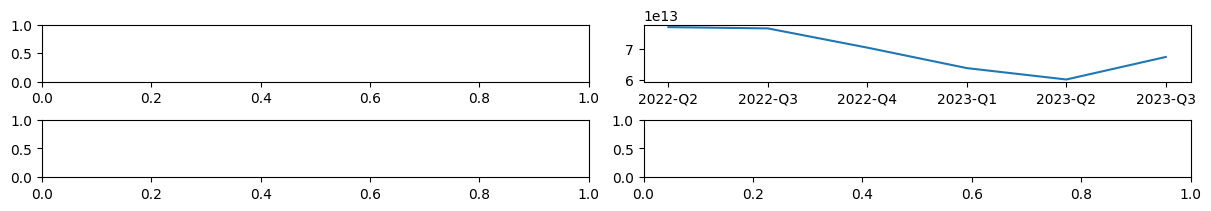

In [15]:
# axe 객체에 차트 추가
fig, axes = plt.subplots(2, 2, figsize=(12, 2), constrained_layout=True)
axes[0, 1].plot(samsung_revenue['quarter'], samsung_revenue['value'])
plt.show()

Figure(640x480)
{'top_left': <Axes: label='top_left'>, 'right': <Axes: label='right'>, 'bottom_left': <Axes: label='bottom_left'>}


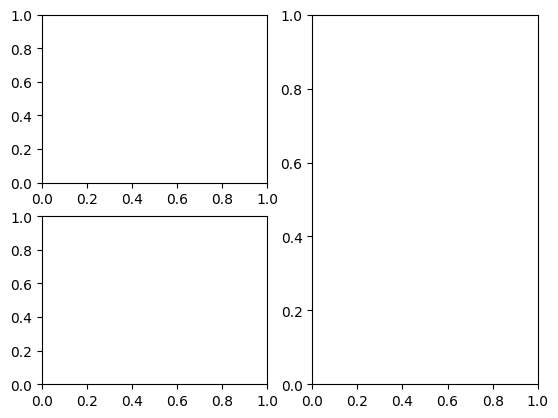

In [16]:
# figure 객체 1개, Axes 객체 3개 (왼쪽 2개, 오른쪽 1개)
fig, axes = plt.subplot_mosaic([['top_left', 'right'],
                               ['bottom_left', 'right']])
print(fig)
print(axes)

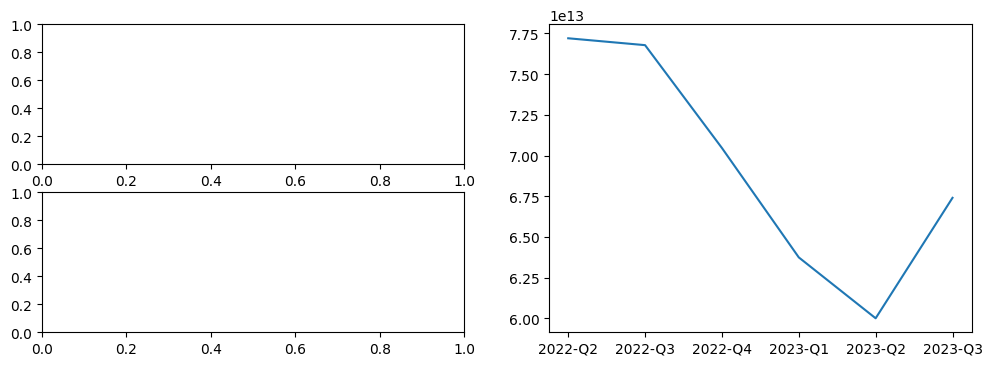

In [20]:
# axe 객체에 차트 추가
fig, axes = plt.subplot_mosaic([['top_left', 'right'],
                               ['bottom_left', 'right']],
                               figsize=(12, 4))
axes['right'].plot(samsung_revenue['quarter'], samsung_revenue['value'])
plt.show()

In [3]:
# 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# .data 데이터를 를 확인
from glob import glob
glob('./data/*.xlsx')[0]
df2 = pd.read_excel(glob('./data/*.xlsx')[0])
print(glob('./data/*.xlsx')[0])
# 시군군 나누기

def split_si(x):
    lastindex = None
    for idx, i in enumerate(x):
        if i == '시':
            lastindex = idx
    if lastindex:
        return x[:lastindex+1]
    else: 
        return x
    
def split_gu(x):
    lastindex = None
    for idx, i in enumerate(x):
        if i == '시':
            lastindex = idx
    if lastindex:
        return x[lastindex+1:]
    else: 
        return x    

df2['시'] = df2['구분'].apply(split_si)
df2['군'] = df2['구분'].apply(split_gu)
df3 = df2.drop(columns=['구분'])
df3.head()

./data\경기도인구데이터.xlsx


,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,시,군
0,287474,285803,290798,293692,290999,291757,300908,301196,299016,296479,293828,수원시,장안구
1,310553,308177,304097,306783,321176,332633,331773,339835,351053,358393,365653,수원시,권선구
2,216945,213235,219833,216503,209772,206794,204805,203479,199180,198515,193311,수원시,팔달구
3,252730,260210,258421,260557,266542,289074,310671,329718,335375,340654,349836,수원시,영통구
4,256744,248452,242161,241070,236123,233997,228167,223539,219531,232841,236932,성남시,수정구


In [4]:
df4 = df3.groupby('시').sum().iloc[:,:-1]
df4.head()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
시,,,,,,,,,,,
가평군,55698,57108,57564,58890,59358,60794,61017,61213,62008,62448,62973
고양시,924839,938831,938784,950115,961239,969916,990571,1006154,1027546,1039684,1041983
과천시,62291,69477,72049,72279,71955,71068,70578,70156,68946,63778,57527
광명시,313019,310501,314257,343982,355226,355560,353100,348560,344978,339484,332790
광주시,229319,234777,238583,249789,265222,275656,286699,298858,312579,327723,345947


In [5]:
import matplotlib.pyplot as plt

# matplotlib 한글 폰트 오류 문제 해결
from matplotlib import font_manager, rc
# font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_path = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)

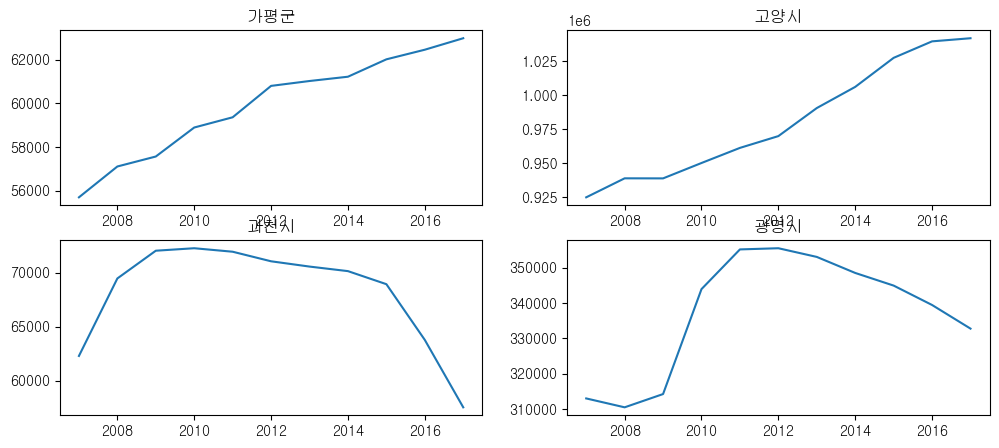

In [6]:
fig,axes = plt.subplots(2,2,figsize=(12,5))
axes[0,0].plot(df4.columns, df4.iloc[0].values)
axes[0,0].set_title('가평군')

axes[0,1].plot(df4.columns, df4.iloc[1].values)
axes[0,1].set_title('고양시')

axes[1,0].plot(df4.columns, df4.iloc[2].values)
axes[1,0].set_title('과천시')

axes[1,1].plot(df4.columns, df4.iloc[3].values)
axes[1,1].set_title('광명시')
plt.show()

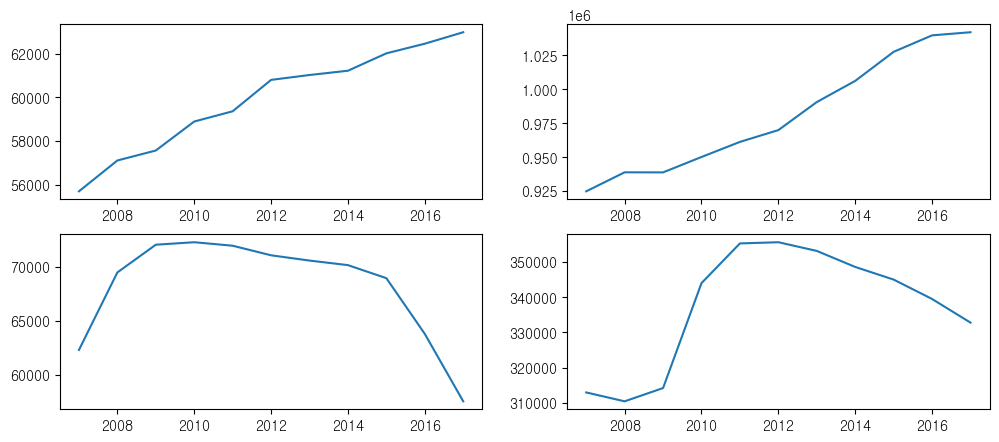

In [7]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1).plot(df4.columns,df4.iloc[0].values)
plt.subplot(2,2,2).plot(df4.columns,df4.iloc[1].values)
plt.subplot(2,2,3).plot(df4.columns,df4.iloc[2].values)
plt.subplot(2,2,4).plot(df4.columns,df4.iloc[3].values)
plt.show()

In [ ]:
row=4
if len(df4) % row !=0:
    